In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 50nano

In [2]:
modulation = 93 #Hz
loop_number = 16000    
res = 1/2972160000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [3]:
sam

1008

In [4]:
sr

2999808000

In [5]:
interval = segment_length*1e9 #nano
interval

336.02150537634407

# AWG and Pulse files setup

In [ ]:
AWG_Settings_50nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':2999808000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\pos\50nano'
}

In [7]:
M8190A = VisaR(AWG_Settings_50nano,60000)

In [8]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [8]:
Initialization(M8190A,AWG_Settings_50nano)

Instruments Sampling Frecuency set to 2.99980800000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_50nano = {
    'Name':'Pump_50nano',
    'Amplitude': 2*60,
    'Start time':100,
    'End time':2e-10,
    'Start Duration':50,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_50nano = {
    'Name':'ProbeA_50nano',
    'Amplitude':2*30,
    'Start time':0,
    'End time':200,
    'Start Duration':50,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_50nano= {
    'Name':'ProbeB_50nano',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':200,
    'Start Duration':50,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [12]:
ProbeB_50nano_empty= {
    'Name':'ProbeB_50nano_empty',
    'Amplitude':0*50,
    'Start time':56,
    'End time':256,
    'Start Duration':50,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_50nano =  {
    'Name' : 'PulseScheme_A_50nano',
    'Pulse Scheme': [Pump_50nano,ProbeA_50nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\50nano'
}

In [14]:
PulseScheme_B_50nano =  {
    'Name' : 'PulseScheme_B_50nano',
    'Pulse Scheme': [Pump_50nano,ProbeB_50nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\50nano'
}

In [15]:
PulseScheme_B_50nano_empty =  {
    'Name' : 'PulseScheme_B_50nano',
    'Pulse Scheme': [ProbeB_50nano_empty,ProbeB_50nano_empty],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\50nano'
}

In [ ]:
93

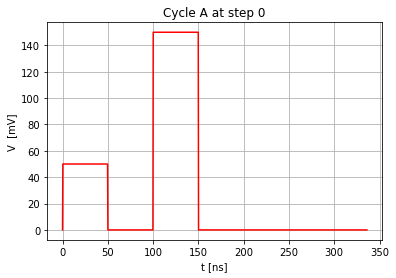

In [87]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_50nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 50 nano 93 Hz mod , {a} step.jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'], a = step),bbox_inches='tight')

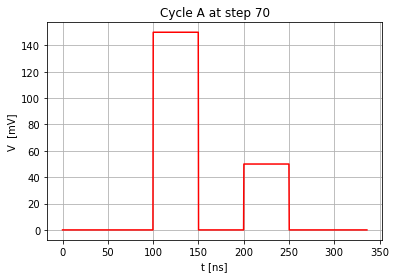

In [88]:
step = 70
pul1 = Sweep_teil(PulseScheme_A_50nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 50 nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'], a = step),bbox_inches='tight')

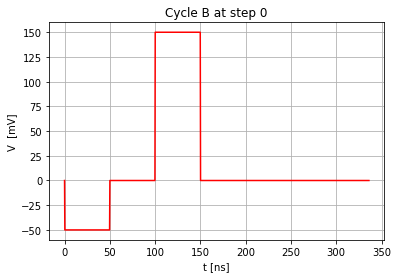

In [89]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_50nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe width 50 nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'], a = step),bbox_inches='tight')

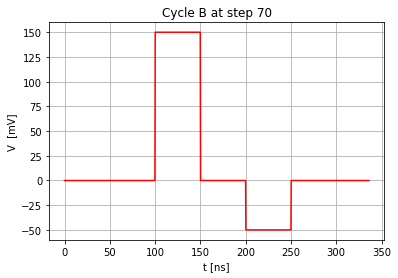

In [90]:
step = 70
pul1 = Sweep_teil(PulseScheme_B_50nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe width 50 nano93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'], a = step),bbox_inches='tight')

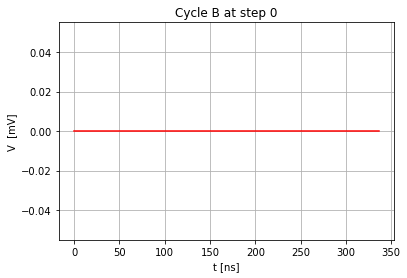

In [21]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_50nano_empty,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 50 nano 93 Hz mod {a} step empty .jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'], a = step),bbox_inches='tight')

In [91]:
sweeping_run_a_50nano = Sweeping_Single_List_File_teil(PulseScheme_A_50nano,70,interval,sam,0,70,AWG_Settings_50nano,'A')[0]
sweeping_run_b_50nano = Sweeping_Single_List_File_teil(PulseScheme_B_50nano,70,interval,sam,0,70,AWG_Settings_50nano,'B')[0]

In [92]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_50nano_.p".format(dict = PulseScheme_A_50nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_50nano, k)


with open(r"{dict}\cycleB_71steps_93Hz_50nano_.p".format(dict = PulseScheme_B_50nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_50nano, h)

In [25]:
AWG_Settings_50nano_empty= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':2999808000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the SMA outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\neg\50nano\empty B cycle'
}

In [26]:
sweeping_run_b_50nano_empty = Sweeping_Single_List_File_teil(PulseScheme_B_50nano_empty,70,interval,sam,0,70,AWG_Settings_50nano_empty,'B')[0]

In [27]:
#Exporting pickle

with open(r"{dict}\cycleB_71steps_93Hz_50nano_empty.p".format(dict = PulseScheme_B_50nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_50nano_empty, h)

In [16]:
#Importing Pickle

with open(r"{dict}\cycleA_71steps_93Hz_50nano_.p".format(dict = PulseScheme_A_50nano['Measurement file Path']), "rb") as j:
    sweeping_runa_50nano = pickle.load(j)

with open(r"{dict}\cycleB_71steps_93Hz_50nano_.p".format(dict = PulseScheme_A_50nano['Measurement file Path']), "rb") as f:
    sweeping_runb_50nano= pickle.load(f)

In [ ]:
sweeping_runa_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_4128_30.csv'

In [ ]:
sweeping_run_b_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
loop_100nano

8000

In [21]:
Sequence_File(M8190A,sweeping_runa_50nano['Pulse File Location, at step 70'],sweeping_runb_50nano['Pulse File Location, at step 70'],loop_number)

Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND


0

In [19]:
Trigger_Pulse('DAQBNC1','ao1',0.05,20)

Triggering Pulse Stopped


# Loading

In [20]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [45]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '200 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [44]:
loop_number

16000

In [118]:
list_cycleB_50nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_8.csv',
 'D:\\Alej

In [135]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loopl(M8190A,DAQ_Settings1,playingtime,list_cycleA_50nano,list_cycleB_50nano,PulseScheme_A_50nano['Measurement file Path'],Lock_In_Settings,loop_number)

Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 0 is 0.4832974421047923 V
Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 1 is 0.46890741167388095 V
Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 2 is 0.12304395242937051 V
Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 3 is 0.06419686667209931 V
Sequence loaded with the following segment data "1,16000,0,1,0,1007,2,16000,0,1,0,1007" and the advancement method is COND
Average Value for measurement at step 4 is 0.48326817201633615 V
Sequence loaded with the following segment data "1,16000,0,1,

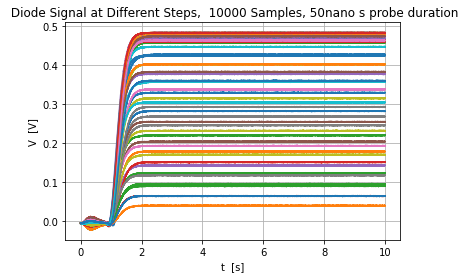

In [136]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 50nano s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 50nano,71 steps, 93 Hz no legend, .jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [137]:
time_delay = np.linspace(0,71,71)

In [ ]:
%matplotlib widget

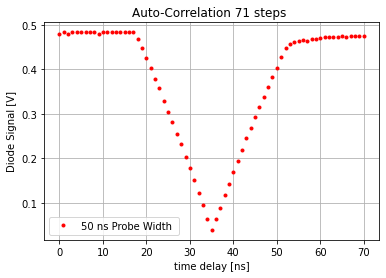

In [148]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(rand_time_delay,averaged_data,'.',label=r'50 ns Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 71 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps 50nano 93Hz length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_50nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
100,
50,
25
10

In [98]:
import random

In [108]:
items  =  sweeping_run_a_50nano.values()
random.shuffle(items)
OrderedDict(items)


TypeError: 'dict_values' object is not subscriptable

In [100]:
sweeping_run_a_50nano.items()

dict_items([('Pulse File Location, at step 0', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_0.csv'), ('Pulse File Location, at step 1', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_1.csv'), ('Pulse File Location, at step 2', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_2.csv'), ('Pulse File Location, at step 3', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_3.csv'), ('Pulse File Location, at step 4', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_4.csv'), ('Pulse File Location, at step 5', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_5.csv'), ('Pulse File Location, at step 6', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50na

In [130]:
c = list(zip(list_cycleA_50nano,list_cycleB_50nano))
random.shuffle(c)

list_cycleA_50nano, list_cycleB_50nano = zip(*c)



In [134]:
list_cycleA_50nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_15.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_32.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_36.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_10.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_29.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_44.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_50.csv',
 

In [132]:
list_cycleB_50nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_15.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_32.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_36.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_10.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_29.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_44.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_50.csv',
 

In [123]:
list_cycleA_50nano = list(sweeping_run_a_50nano.values())
list_cycleA_50nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_8.csv',
 'D:\\Alej

In [122]:
random.shuffle(list_cycleA_50nano)
list_cycleA_50nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_36.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_47.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_28.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_24.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_32.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_61.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_35.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_10.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_68.csv',
 

In [124]:
list_cycleB_50nano = list(sweeping_run_b_50nano.values())
list_cycleB_50nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentB_1008_8.csv',
 'D:\\Alej

In [107]:
sweeping_run_a_50nano.values()

dict_values(['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_0.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_1.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_2.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_3.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_4.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_5.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_6.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_7.csv', 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_8.csv', 'D:\\A

In [121]:
def Voltage_Autocorrelation_loopl(instrument,DAQ_settings,playingtime,fileA,fileB,location,Lock_In,loop):
    
    """ This function loads a sweeping sequence into the AWG, plays it and triggers it with the DAQ, while also storing the DAQ values as csv files.
      
        Sequences are formed within the AWG by combining the csv files at the same step in fileA and fileB

        instrument = object class given by Pyvisa API of the current connected device
        DAQ_Settings = Dictionary, with the settings of the DAQ box
        playingtime = int, total data collection time of the DAQ, given in seconds, maximum is 180s (given by the timeout time in the DAQ_Measuring function)
        fileA = dictionary, with the file paths of the csv files to be loaded into the awg as first part of the sequence
        fileB = dictionary, with the file paths of the csv files to be loaded into the awg as second part of the sequence
        location = strng, file path were the data is going to be saved
        Lock_In = dictionary, the keys are the Lock In Amplifier settings used to address them in the file name
        loop = int, number of repetitions that each waveform will repeat itself per cycle
    """
    #empty arrays where the data will be stored
    measurement_data = np.zeros((len(fileA),2),  dtype=object)
    average = np.zeros((len(fileA)))

    for i,j,k in zip(range(0,len(fileA)), range(0,len(fileB)),range(0,len(fileA))):
        Sequence_File(instrument,fileA[i],fileB[j],loop)
        measurement_data[k][0], measurement_data[k][1] = DAQ_Measuring(DAQ_settings,DAQ_settings['Sampling Frequency'],playingtime,instrument)
        np.savetxt(r'{loc}\diode_signal_step{stp}_{f}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc = location ,stp = k,f = playingtime, mod = Lock_In['Modulation'] ,tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']), measurement_data[k][0], delimiter=',')
        average[k] = np.average(measurement_data[k][0][3000:])
        print('Average Value for measurement at step {step} is'.format(step = k),average[k],'V')
        np.savetxt(r'{loc}\averaged signal_31steps_{dur}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc =location,dur = playingtime,  mod = Lock_In['Modulation'] , tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']),average,delimiter=',')
        
    return measurement_data, average

In [142]:
rand_time_delay =np.array([15,
59,
32,
36,
10,
29,
18,
44,
50,
12,
24,
30,
53,
54,
11,
27,
17,
9.,
6.,
66,
20,
4.,
16,
13,
39,
67,
41,
2.,
40,
64,
26,
35,
19,
56,
22,
58,
14,
45,
70,
23,
51,
21,
42,
3.,
60,
57,
47,
7.,
28,
63,
62,
0.,
37,
31,
69,
49,
8.,
43,
1.,
52,
34,
68,
33,
5.,
61,
65,
55,
38,
46,
25,
48])

In [143]:
rand_time_delay.size

71

In [ ]:
('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_15.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_32.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_36.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_10.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_29.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_44.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_50.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_12.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_24.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_30.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_53.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_54.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_11.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_27.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_17.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_9.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_66.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_20.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_16.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_13.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_39.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_67.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_41.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_40.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_64.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_26.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_35.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_19.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_56.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_22.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_58.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_14.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_45.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_70.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_23.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_51.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_21.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_42.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_60.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_57.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_47.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_28.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_63.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_62.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_37.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_31.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_69.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_49.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_8.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_43.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_52.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_34.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_68.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_33.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_61.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_65.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_55.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_38.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_46.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_25.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\50nano\\SegmentA_1008_48.csv')